In [1]:
import torch
from torch import nn as nn
from torch.nn import functional as F
import pandas as pd
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import re
from tld import get_tld
from typing import Tuple, Union, Any
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/lenovo/Desktop/url project/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/lenovo/Desktop/url project/input\malicious_phish.csv


In [3]:
dataset = pd.read_csv('C:/Users/lenovo/Desktop/url project/malicious_phish.csv')
dataset

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [5]:
dataset.isnull().sum()

url     0
type    0
dtype: int64

In [6]:
count = dataset.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [7]:
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

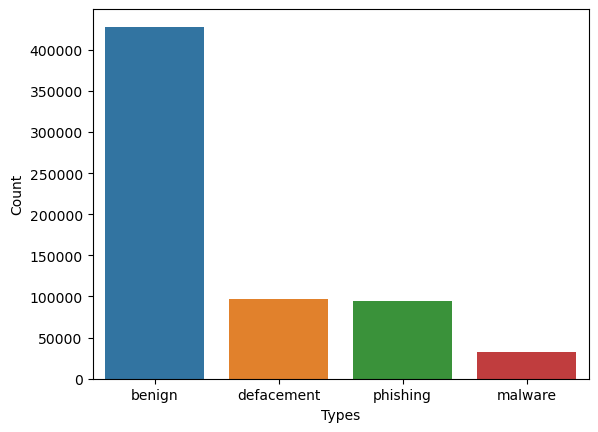

In [8]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [9]:
dataset['url'] = dataset['url'].replace('www.', '', regex=True)
dataset

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [10]:
dataset.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [11]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
dataset['Category'] = dataset['type']
data = dataset.replace(rem)
data.head(20)

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


In [12]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [13]:
data.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


In [14]:
def process_tld(url):
    try:
#         Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain



# netloc : Contains the network location - which includes the domain itself (and subdomain if present), 
# the port number, along with an optional credentials in form of username:password . Together it may take
# form of username:password@domain.com:80

In [15]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [16]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [17]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
    

    

# urlparse():This function parses a URL into six components, returning a 6-tuple. 
# This corresponds to the general structure of a URL. Each tuple item is a string. 
# The components are not broken up in smaller parts 
#(for example, the network location is a single string), and % escapes are not expanded.

In [18]:
from colorama import Fore  #Colorama is a module to color the python outputs

from urllib.parse import urlparse
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1


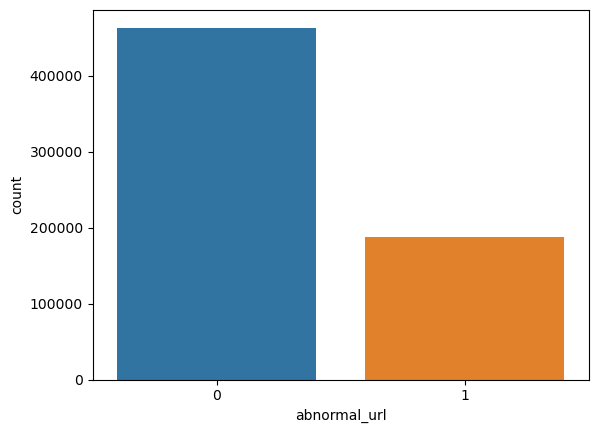

In [19]:
sns.countplot(x='abnormal_url', data=data);

In [20]:
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [21]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0


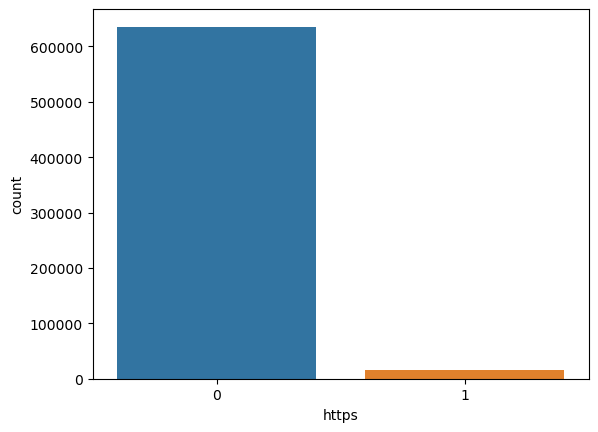

In [22]:
sns.countplot(x='https', data=data);

In [23]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
data['digits']= data['url'].apply(lambda i: digit_count(i))
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,0,1,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,0,1,1,0,22


In [24]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# The isalpha() method returns True if all the characters are alphabet letters (a-z). 
# Example of characters that are not alphabet letters: (space)!

In [25]:
data['letters']= data['url'].apply(lambda i: letter_count(i))
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    

# A URL shortening service is a third-party website that converts that long URL to a short, 
# case-sensitive alphanumeric code. Simply put, this means that a URL shortening service takes 
# ridiculously long URLs (web addresses) and makes them short.

In [26]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,1,1,0,22,199,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,0,1,1,0,1,93,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,0,4,31,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,0,0,40,1
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,0,1,1,0,0,34,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,0,5,33,0


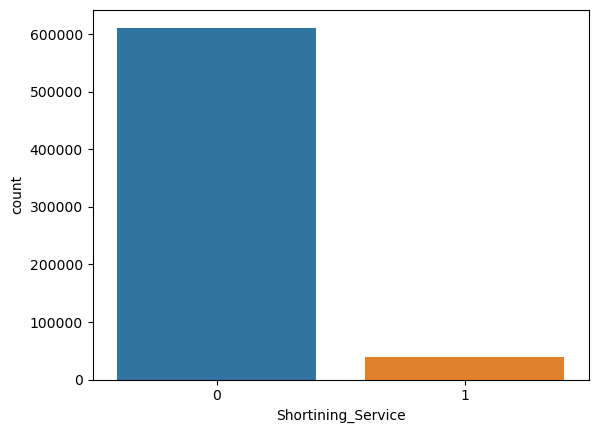

In [27]:
sns.countplot(x='Shortining_Service', data=data);

In [28]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [29]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,22,199,0,0


In [30]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

<AxesSubplot:>

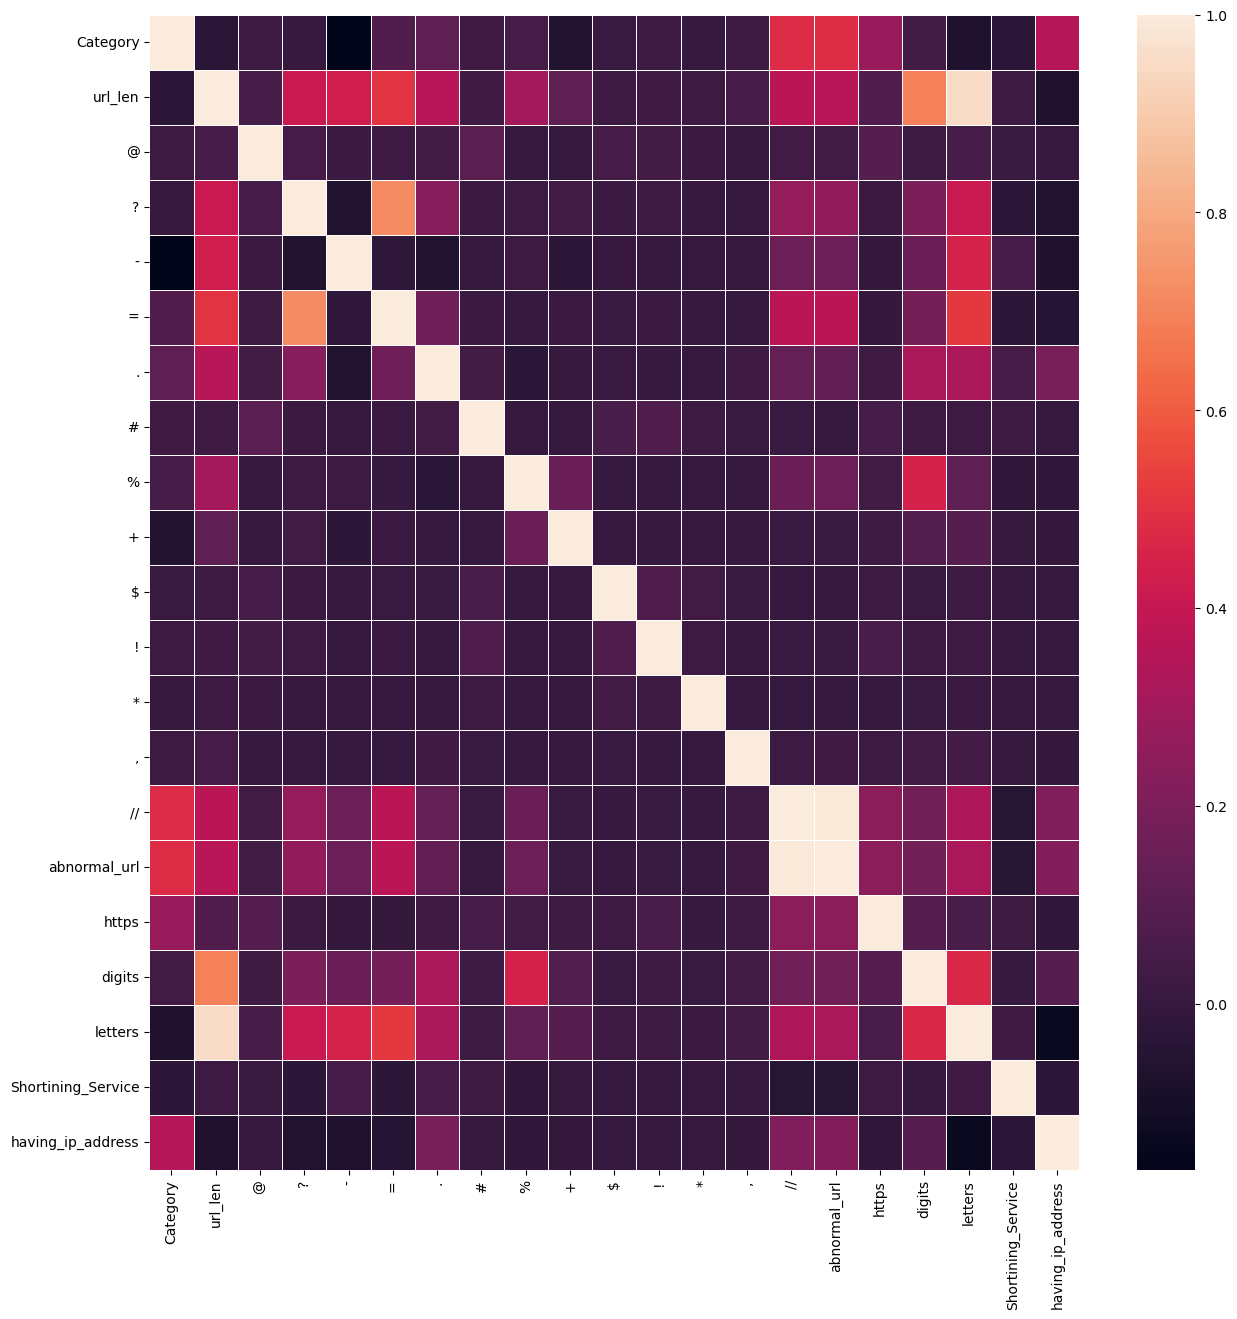

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [180]:

X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [181]:
y.shape

(651191,)

In [169]:
# sequences = [
#     [1, 2, 3, 4],
#        [1, 2, 3],
#              [1]
#     ]

# # pad sequence
# padded = pad_sequences(sequences)
# X = np.expand_dims(padded, axis = 0)
# print('Shape of X is ', X.shape) # (1, 3, 4)

# y = np.array([1,0,1])
# y = y.reshape(1,-1)
# print('Shape of y is', y.shape) # (1, 3)


In [178]:
X

array([[0.00689972, 0.        , 0.        , ..., 0.00607193, 0.        ,
        0.        ],
       [0.01563937, 0.        , 0.        , ..., 0.01354507, 0.        ,
        0.        ],
       [0.01379945, 0.        , 0.        , ..., 0.01167679, 0.        ,
        0.        ],
       ...,
       [0.01701932, 0.        , 0.        , ..., 0.01401214, 1.        ,
        0.        ],
       [0.02023919, 0.        , 0.        , ..., 0.01681457, 0.        ,
        0.        ],
       [0.01655934, 0.        , 0.        , ..., 0.01541336, 0.        ,
        0.        ]])

In [179]:
y

0         2
1         0
2         0
3         1
4         1
         ..
651186    2
651187    2
651188    2
651189    2
651190    2
Name: Category, Length: 651191, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [190]:
X_train = X_train.values
X_test = X_test.values
X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)


In [191]:
X_train.shape

(520952, 20, 1)

In [194]:
from keras.models import Sequential, load_model
from keras.layers import GRU
from keras.layers.core import Dense, Dropout
model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=256))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X_train,y_train,batch_size=250, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
1876/1876 [==============================] - 3758s 2s/step - loss: 0.5060 - val_loss: 0.4962
Epoch 2/50
1876/1876 [==============================] - 3666s 2s/step - loss: 0.5050 - val_loss: 0.4978
Epoch 3/50
1876/1876 [==============================] - 3770s 2s/step - loss: 0.5040 - val_loss: 0.5021
Epoch 4/50
1876/1876 [==============================] - 3861s 2s/step - loss: 0.5016 - val_loss: 0.4944
Epoch 5/50
1876/1876 [==============================] - 3880s 2s/step - loss: 0.5003 - val_loss: 0.4973
Epoch 6/50
1876/1876 [==============================] - 3896s 2s/step - loss: 0.4997 - val_loss: 0.4916
Epoch 7/50
1876/1876 [==============================] - 3778s 2s/step - loss: 0.4990 - val_loss: 0.4924
Epoch 8/50
1876/1876 [==============================] - 3741s 2s/step - loss: 0.4978 - val_loss: 0.4917
Epoch 9/50
1876/1876 [==============================] - 3762s 2s/step - loss: 0.4964 - val_loss: 0.4948
Epoch 10/50
1876/1876 [==============================] - 3772s 2

In [197]:

model.save('gru_model10.h5')
print('MODEL-SAVED')

score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

MODEL-SAVED
4070/4070 [==============================] - 556s 137ms/step - loss: 0.5053
Score: 0.505284309387207
